In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

import re
import spacy

from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel

from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sarma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sarma\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\sarma\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### NLP Basics

In [5]:
my_string = "Let's write RegEx!"

re.findall(r"\w+", my_string)

['Let', 's', 'write', 'RegEx']

**New String**

In [6]:
string_a = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

**Split by ending sentence**

In [7]:
sentence_ending = r"[.?!]"
re.split(sentence_ending, string_a)

["Let's write RegEx",
 "  Won't that be fun",
 '  I sure think so',
 '  Can you find 4 sentences',
 '  Or perhaps, all 19 words',
 '']

**Find Capitalize Words**

In [8]:
capitalize = r"[A-Z]\w+"
re.findall(capitalize, string_a)

['Let', 'RegEx', 'Won', 'Can', 'Or']

**Find Spaces**

In [9]:
spaces = r"\s+"
re.split(spaces, string_a)

["Let's",
 'write',
 'RegEx!',
 "Won't",
 'that',
 'be',
 'fun?',
 'I',
 'sure',
 'think',
 'so.',
 'Can',
 'you',
 'find',
 '4',
 'sentences?',
 'Or',
 'perhaps,',
 'all',
 '19',
 'words?']

**Find Digits**

In [10]:
digits = r"\d+"
re.findall(digits, string_a)

['4', '19']

### Tokenization Basics

In [11]:
word_tokenize("Hi there!")

['Hi', 'there', '!']

**Search for the first occurrence of "coconuts"**

In [12]:
cocunut = "It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconuts."

In [13]:
match = re.search("coconuts", cocunut)

# Print the start and end indexes of match
print(match.start(), match.end())

131 139


**Regex Groups**

In [14]:
string_b = "He has 11 cats."
match_dw = r"\d+|\w+"

re.findall(match_dw, string_b)

['He', 'has', '11', 'cats']

In [15]:
# Character Range with "re.match"
my_str = "match lowercase spaces nums like 12, but no commas"
exp = r"[a-z0-9 ]+"

print(re.match(exp, my_str))

<re.Match object; span=(0, 35), match='match lowercase spaces nums like 12'>


**Choosing a tokenizer**

In [16]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

exp_r = r"(\w+|#\d|\?|!)"

regexp_tokenize(my_string, exp_r)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

**Extracting Hashtags from tweets**

In [17]:
tweet_1 = "his is the best #nlp exercise ive found online! #python"
pattern1 = r"#\w+"

regexp_tokenize(tweet_1, pattern1)

['#nlp', '#python']

**Extracting Hashtags and Mentions from tweets**

In [18]:
tweet_2 = "Thanks @datacamp :) #nlp #python"
pattern2 = r"[@|#]\w+"

regexp_tokenize(tweet_2, pattern2)

['@datacamp', '#nlp', '#python']

### Charting word length with NLTK

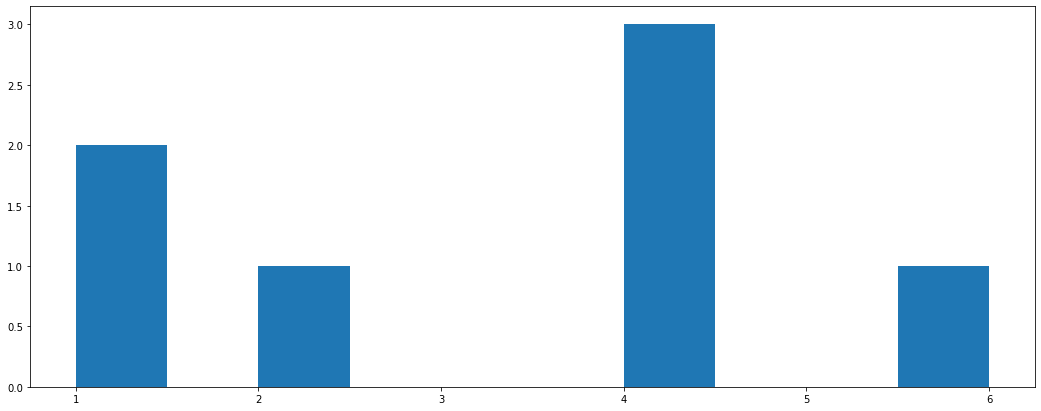

In [19]:
words = word_tokenize("This is a pretty cool tool!")

word_length = [len(w) for w in words]

plt.figure(figsize = (18, 7))
plt.hist(word_length)
plt.show()

### Bag of Words

In [20]:
string_c = "The cat is in the box. The cat likes the box. The box is over the cat."

In [21]:
Counter(word_tokenize(string_c))

Counter({'The': 3,
         'cat': 3,
         'is': 2,
         'in': 1,
         'the': 3,
         'box': 3,
         '.': 3,
         'likes': 1,
         'over': 1})

**Common**

In [22]:
Counter(word_tokenize(string_c)).most_common(2)

[('The', 3), ('cat', 3)]

In [23]:
string_2 = "The cat is in the box. The cat box."

Counter(word_tokenize(string_2))

Counter({'The': 2, 'cat': 2, 'is': 1, 'in': 1, 'the': 1, 'box': 2, '.': 2})

In [24]:
Counter(word_tokenize(string_2)).most_common(2)

[('The', 2), ('cat', 2)]

### Building a Counter with bag-of-words

In [25]:
f = "A software bug is an error, flaw, failure or fault (technology)|fault in a computer program or software system|system that causes it to produce an incorrect or unexpected result, or to behave in unintended ways. Most bugs arise from mistakes and errors made in either a program's source code or its software architecture|design, or in components and operating systems used by such programs. A few are caused by compilers producing incorrect code. A program that contains a large number of bugs, and/or bugs that seriously interfere with its functionality, is said to be buggy (defective)."

In [26]:
# Tokenize the article
tokens = word_tokenize(f)

# Convert the tokens into lowercase
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens
bow_simple = Counter(lower_tokens)
bow_simple.most_common(3)

[('a', 6), (',', 6), ('or', 6)]

### Simple text preprocessing

In [27]:
text = "The cat is in the box. The cat likes the box. The box is over the cat."

In [28]:
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()] 

no_stops = [t for t in tokens if t not in stopwords.words("english")]

Counter(no_stops).most_common(2)

[('cat', 3), ('box', 3)]

### Text Preprocessing

In [29]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in word_tokenize(text.lower()) if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words("english")]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('cat', 3), ('box', 3), ('like', 1)]


### Genism

In [30]:
g = "software bugs, or errors, are so prevalent and so detrimental that they cost the US economy an estimated $59&nbsp;billion annually, or about 0.6 percent of the gross domestic product. Government researchers, companies, and cyber security experts are the people who typically discover software flaws. The report calls for reforming computer crime and copyright laws."

In [31]:
tokenize_words = [word_tokenize(w.lower()) for w in g]

dictionary = Dictionary(tokenize_words)

print(dictionary.token2id)

{'s': 0, 'o': 1, 'f': 2, 't': 3, 'w': 4, 'a': 5, 'r': 6, 'e': 7, 'b': 8, 'u': 9, 'g': 10, ',': 11, 'p': 12, 'v': 13, 'l': 14, 'n': 15, 'd': 16, 'i': 17, 'm': 18, 'h': 19, 'y': 20, 'c': 21, '$': 22, '5': 23, '9': 24, '&': 25, ';': 26, '0': 27, '.': 28, '6': 29, 'x': 30}


### Creating a Gensim Corpus

In [32]:
corpus = [dictionary.doc2bow(doc) for doc in tokenize_words]
print(corpus[:5])

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)]]


### Tf-idf with Gensim

In [33]:
tfidf = TfidfModel(corpus)
tfidf[corpus[1]]

[(1, 1.0)]

### Named Entity Recognition

In [34]:
sentence = "In New York, I like to ride thr Metro to visit MOMA and some restaurants rated well by Ruth Reichl"

In [35]:
tokenized_sent = word_tokenize(sentence)
tagged_sent = nltk.pos_tag(tokenized_sent)
tagged_sent

[('In', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('like', 'VBP'),
 ('to', 'TO'),
 ('ride', 'VB'),
 ('thr', 'RB'),
 ('Metro', 'NNP'),
 ('to', 'TO'),
 ('visit', 'VB'),
 ('MOMA', 'NNP'),
 ('and', 'CC'),
 ('some', 'DT'),
 ('restaurants', 'NNS'),
 ('rated', 'VBN'),
 ('well', 'RB'),
 ('by', 'IN'),
 ('Ruth', 'NNP'),
 ('Reichl', 'NNP')]

### Building word count vectors with scikit-learn

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [56]:
df = pd.read_csv("fake_or_real_news.csv")
df[:2]

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE


In [57]:
# Feature
X = df["text"]

# Target
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [58]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words = "english", max_df = 0.7)


# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)


# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

In [59]:
# Print the first 10 features of the count_vectorizer
count_vectorizer.get_feature_names()[:5]

['00', '000', '0000', '000000031', '00000031']

In [60]:
print(count_train[:5])

  (0, 33931)	2
  (0, 53309)	1
  (0, 16113)	2
  (0, 52709)	25
  (0, 11329)	1
  (0, 37778)	1
  (0, 21725)	3
  (0, 17236)	2
  (0, 40087)	4
  (0, 13860)	7
  (0, 18793)	2
  (0, 30857)	1
  (0, 20752)	1
  (0, 51857)	3
  (0, 43080)	1
  (0, 36360)	1
  (0, 33823)	1
  (0, 51390)	3
  (0, 25850)	1
  (0, 17289)	1
  (0, 16047)	2
  (0, 36100)	1
  (0, 42008)	2
  (0, 30837)	1
  (0, 14246)	1
  :	:
  (4, 56525)	1
  (4, 52368)	1
  (4, 42763)	1
  (4, 49498)	1
  (4, 36093)	1
  (4, 49897)	1
  (4, 5926)	1
  (4, 24526)	1
  (4, 43585)	1
  (4, 39960)	1
  (4, 22659)	1
  (4, 11205)	1
  (4, 23019)	1
  (4, 42886)	1
  (4, 25548)	1
  (4, 4482)	1
  (4, 19255)	1
  (4, 25468)	1
  (4, 40797)	1
  (4, 7778)	1
  (4, 13250)	1
  (4, 29092)	1
  (4, 50864)	1
  (4, 40437)	1
  (4, 9774)	1


### TfidfVectorizer for text classification

In [62]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = "english",
                                   max_df = 0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features
tfidf_vectorizer.get_feature_names()[:5]

['00', '000', '0000', '000000031', '00000031']

In [65]:
print(tfidf_train.A[:5])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03791267 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### Inspecting the vectors

In [66]:
count_df = pd.DataFrame(count_train.A,
                        columns = count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A,
                        columns = tfidf_vectorizer.get_feature_names())

In [69]:
count_df[:5]

,00,000,0000,000000031,00000031,0001,0002,000billion,000ft,000km,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
tfidf_df[:5]

,00,000,0000,000000031,00000031,0001,0002,000billion,000ft,000km,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.037913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Naive Bayes with Scikit-Learn

In [85]:
import numpy as np

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)

pd.DataFrame({"Actual": y_test, "Predicted": pred})[:5]

,Actual,Predicted
1357,FAKE,FAKE
2080,FAKE,FAKE
2718,FAKE,FAKE
812,FAKE,REAL
4886,FAKE,FAKE


In [75]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8842714360862703

In [80]:
print(confusion_matrix(y_test, pred))

[[824 144]
 [ 76 857]]


In [79]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.92      0.85      0.88       968
        REAL       0.86      0.92      0.89       933

    accuracy                           0.88      1901
   macro avg       0.89      0.88      0.88      1901
weighted avg       0.89      0.88      0.88      1901



### Training and testing the "fake news" model with TfidfVectorizer

In [81]:
# Create a Multinomial Naive Bayes classifier:
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags
pred = nb_classifier.predict(tfidf_test)

pd.DataFrame({"Actual": y_test, "Predicted": pred})[:5]

,Actual,Predicted
1357,FAKE,FAKE
2080,FAKE,FAKE
2718,FAKE,FAKE
812,FAKE,REAL
4886,FAKE,FAKE


In [82]:
print(confusion_matrix(y_test, pred))

[[646 322]
 [ 19 914]]


In [83]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.97      0.67      0.79       968
        REAL       0.74      0.98      0.84       933

    accuracy                           0.82      1901
   macro avg       0.86      0.82      0.82      1901
weighted avg       0.86      0.82      0.82      1901



### Improving Model

In [89]:
alphas = np.arange(0, 1, 0.1)
model_score = []

for a in alphas:
    nb_classifier = MultinomialNB(alpha = a)
    
    nb_classifier.fit(tfidf_train, y_train)
    
    pred = nb_classifier.predict(tfidf_test)
    
    score = accuracy_score(y_test, pred)
    
    model_score.append(score)

performance = pd.DataFrame({"Alpha": alphas,
                            "Score": model_score})
performance

,Alpha,Score
0,0.0,0.888480
1,0.1,0.886902
2,0.2,0.881115
3,0.3,0.873225
4,0.4,0.867964
5,0.5,0.862704
6,0.6,0.851131
7,0.7,0.842714
8,0.8,0.833246
9,0.9,0.827985


In [96]:
best_performance = performance[performance["Score"] == performance["Score"].max()]
best_performance

,Alpha,Score
0,0.0,0.88848
